In [4]:
import pandas as pd

In [5]:
# 1. Load your dataset (CSV or created from pcap)
df = pd.read_csv("traffic.csv")

In [6]:
# 2. View the data
print(df)

    frame.time_relative        ip.src        ip.dst  tcp.srcport  tcp.dstport  \
0              0.000000  172.16.33.16  172.16.33.16         8794         5000   
1              0.000139  172.16.33.16  172.16.33.16         5000         8794   
2              0.000200  172.16.33.16  172.16.33.16         8794         5000   
3              0.000636  172.16.33.16  172.16.33.16         8794         5000   
4              0.000690  172.16.33.16  172.16.33.16         5000         8794   
5              0.015435  172.16.33.16  172.16.33.16         8795         5000   
6              0.015568  172.16.33.16  172.16.33.16         5000         8795   
7              0.015621  172.16.33.16  172.16.33.16         8795         5000   
8              0.020594  172.16.33.16  172.16.33.16         5000         8794   
9              0.020651  172.16.33.16  172.16.33.16         8794         5000   
10             0.020703  172.16.33.16  172.16.33.16         5000         8794   
11             0.020722  172

In [13]:
def classify_login(user_agent, frame_len, time_relative, ip_src, ip_dst):
    try:
        if isinstance(user_agent, str) and "python-requests" in user_agent:
            return "bot"
        if ip_src == "127.0.0.1" or ip_dst == "127.0.0.1":
            return "bot"
        if frame_len < 100 and time_relative < 0.05:
            return "bot"
        return "human"
    except:
        return "unknown"


In [14]:
df['predicted_type'] = df.apply(
    lambda row: classify_login(
        row['http.user_agent'],
        row['frame.len'],
        row['frame.time_relative'],
        row['ip.src'],
        row['ip.dst']
    ),
    axis=1
)

In [15]:
print(df[['frame.time_relative', 'http.user_agent', 'frame.len', 'Label', 'predicted_type']])


    frame.time_relative                                    http.user_agent  \
0              0.000000                                                NaN   
1              0.000139                                                NaN   
2              0.000200                                                NaN   
3              0.000636  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...   
4              0.000690                                                NaN   
5              0.015435                                                NaN   
6              0.015568                                                NaN   
7              0.015621                                                NaN   
8              0.020594                                                NaN   
9              0.020651                                                NaN   
10             0.020703                                                NaN   
11             0.020722                                         

In [16]:
# Convert 'predicted_type' to 0 (human) and 1 (bot)
df['predicted_label'] = df['predicted_type'].map({'human': 0, 'bot': 1})

# Calculate accuracy
correct = (df['Label'] == df['predicted_label']).sum()
total = len(df)
accuracy = correct / total * 100

print(f"Accuracy: {accuracy:.2f}% ({correct}/{total} correct)")


Accuracy: 67.50% (27/40 correct)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


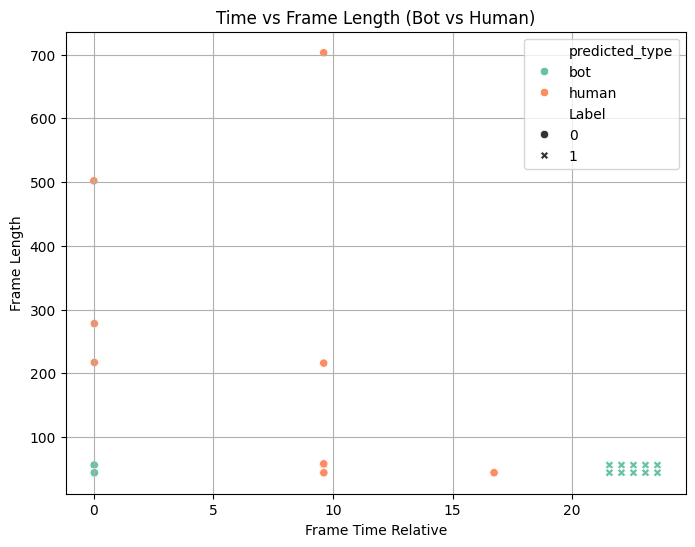

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='frame.time_relative', y='frame.len', hue='predicted_type', style='Label', palette='Set2')
plt.title("Time vs Frame Length (Bot vs Human)")
plt.xlabel("Frame Time Relative")
plt.ylabel("Frame Length")
plt.grid(True)
plt.show()


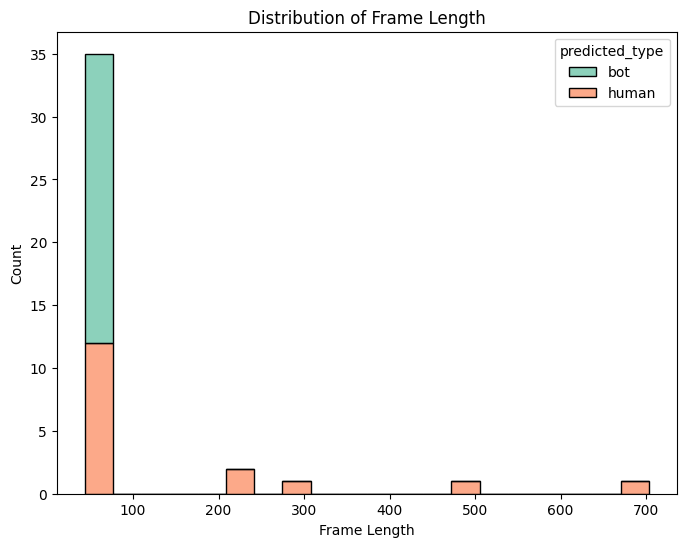

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='frame.len', hue='predicted_type', multiple='stack', bins=20, palette='Set2')
plt.title("Distribution of Frame Length")
plt.xlabel("Frame Length")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-20-4256282920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_len, x='predicted_type', y='frame.len', palette='Set2')


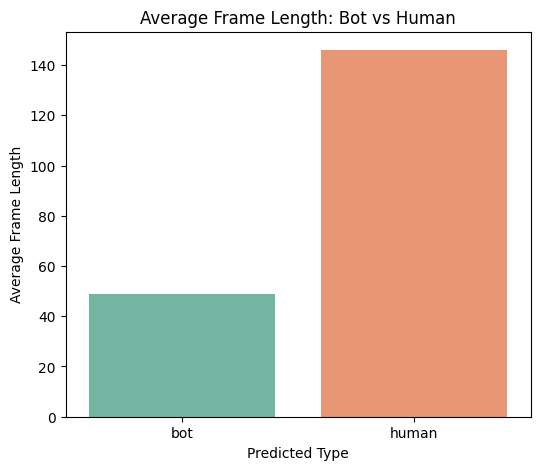

In [20]:
plt.figure(figsize=(6, 5))
avg_len = df.groupby('predicted_type')['frame.len'].mean().reset_index()
sns.barplot(data=avg_len, x='predicted_type', y='frame.len', palette='Set2')
plt.title("Average Frame Length: Bot vs Human")
plt.ylabel("Average Frame Length")
plt.xlabel("Predicted Type")
plt.show()
